In [1]:
from genparse.fst import FST, EPSILON
from genparse import Float
from arsenal import iterview

In [2]:
fst = FST(Float)

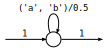

In [3]:
a2b = FST(Float)
a2b.add_I(0, 1.0)
a2b.add_arc(0, ('a', 'b'), 0, 0.5)
a2b.add_F(0, 1.0)

assert a2b('aaa', 'bbb') == 0.5**3
a2b

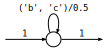

In [4]:
b2c = FST(Float)
b2c.add_I(0, 1.0)
b2c.add_arc(0, ('b', 'c'), 0, 0.5)
b2c.add_F(0, 1.0)

assert b2c('bb', 'cc') == 0.5**2
b2c

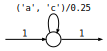

In [5]:
a2c = a2b @ b2c
a2c.trim

In [6]:
print(a2c('aaa', 'ccc') )

0.015625


In [7]:
x = a2b('a', None).trim

In [8]:
x('b')

0.5

In [9]:
x

In [10]:
x = a2b('a', None).trim.renumber
x

In [11]:
x = a2b(None, 'b').trim.renumber
x

In [12]:
x('a')

0.5

In [13]:
x(['a'])

0.5

In [14]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
print(f'token vocabulary size: {tokenizer.vocab_size}')
T = [(token_id, tokenizer.decode([token_id])) for token_id in range(tokenizer.vocab_size)]

token vocabulary size: 50257


In [15]:
import random
random.seed(8675309)
#S = random.sample(T, 15)
S = T
S

[(0, '!'),
 (1, '"'),
 (2, '#'),
 (3, '$'),
 (4, '%'),
 (5, '&'),
 (6, "'"),
 (7, '('),
 (8, ')'),
 (9, '*'),
 (10, '+'),
 (11, ','),
 (12, '-'),
 (13, '.'),
 (14, '/'),
 (15, '0'),
 (16, '1'),
 (17, '2'),
 (18, '3'),
 (19, '4'),
 (20, '5'),
 (21, '6'),
 (22, '7'),
 (23, '8'),
 (24, '9'),
 (25, ':'),
 (26, ';'),
 (27, '<'),
 (28, '='),
 (29, '>'),
 (30, '?'),
 (31, '@'),
 (32, 'A'),
 (33, 'B'),
 (34, 'C'),
 (35, 'D'),
 (36, 'E'),
 (37, 'F'),
 (38, 'G'),
 (39, 'H'),
 (40, 'I'),
 (41, 'J'),
 (42, 'K'),
 (43, 'L'),
 (44, 'M'),
 (45, 'N'),
 (46, 'O'),
 (47, 'P'),
 (48, 'Q'),
 (49, 'R'),
 (50, 'S'),
 (51, 'T'),
 (52, 'U'),
 (53, 'V'),
 (54, 'W'),
 (55, 'X'),
 (56, 'Y'),
 (57, 'Z'),
 (58, '['),
 (59, '\\'),
 (60, ']'),
 (61, '^'),
 (62, '_'),
 (63, '`'),
 (64, 'a'),
 (65, 'b'),
 (66, 'c'),
 (67, 'd'),
 (68, 'e'),
 (69, 'f'),
 (70, 'g'),
 (71, 'h'),
 (72, 'i'),
 (73, 'j'),
 (74, 'k'),
 (75, 'l'),
 (76, 'm'),
 (77, 'n'),
 (78, 'o'),
 (79, 'p'),
 (80, 'q'),
 (81, 'r'),
 (82, 's'),
 (83, 't'),
 

In [16]:
def bpe_wfst(S):
    m = FST(Float)
    START = 0
    STOP = 1
    m.add_I(0, 1)
    for i, x in iterview(S): 
        m.add_arc(START, (i, EPSILON), (i, 0), 1)
        for j in range(len(x)):
            m.add_arc((i,j), (EPSILON, x[j]), (i,j+1), 1)
        m.add_arc((i,len(x)), (EPSILON, EPSILON), STOP, 1)
    m.add_F(STOP, 1)
    m.add_arc(STOP, (EPSILON, EPSILON), START, 1)
    return m

In [17]:
T_b_c = bpe_wfst(S)

Output()

In [20]:
e = T_b_c.project(1).renumber.epsremove

ZeroDivisionError: float division by zero

In [19]:
e('zon purple MIDI Turtlesicken')

KeyboardInterrupt: 

In [ ]:
from genparse.util import LarkStuff

In [ ]:
lark_stuff = LarkStuff("""

start: [ KEYWORD | INTEGER | BOOLEAN ] EOS

EOS: "</s>"
NAME: /[A-Za-z]+/
KEYWORD: "SELECT" | "WHERE" | "FROM"
INTEGER: /[1-9][0-9]*/
BOOLEAN: "true"  | "false"
    
""")

In [ ]:
m = lark_stuff.transducer()

In [ ]:
tmp = m('SELECT', None).trim.epsremove.trim
tmp

In [ ]:
tmp = m('SELECT\n\t\r FROM 1 2', None).trim.epsremove.trim#.min
tmp

In [ ]:
tmp = m('SELECT\nFROM', ('KEYWORD', 'KEYWORD'))
tmp